In [1]:
## import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split # function for splitting data to train and test sets

import nltk
from nltk.corpus import stopwords
from nltk.classify import SklearnClassifier
from collections import Counter
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
nltk.download('wordnet')


import matplotlib.pyplot as plt
%matplotlib inline

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

from subprocess import check_output

[nltk_data] Downloading package wordnet to C:\Users\Harshini
[nltk_data]     Badam\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
#uploading the data\.
data = pd.read_csv("/Users/Harshini Badam/Downloads/archive/all_combined.csv")
data.fillna('') 

,reviewId,content,score,app
0,418c7de9-67bc-4b1a-9890-61dcb3d694e3,It is not a security platform on which I can s...,1,Facebook
1,10e9078b-2706-4e2f-9185-2f96da80a112,"There is no freedom of expression, controlling...",1,Facebook
2,468af182-729f-4570-aa1b-89ec505d64a6,Back media and file and link 😡,1,Facebook
3,db1d7793-fe9f-403d-9243-a62e8fcdac3f,It's a good app but bad for school going stude...,3,Facebook
4,d49755ca-3890-42de-b079-99cf87a07bab,Soooo bad,1,Facebook
...,...,...,...,...
199995,c7585b11-4bde-42dd-8b4a-3437f8ef4f89,"It's a great app, but I always face problems i...",4,LINE
199996,3fc1019b-4475-43a7-a006-a3e9b2844a9e,This apps it's so very helpful for me,5,LINE
199997,6b876536-6c2a-46c9-9e32-dada7220fdee,"Too much ADS, UI is changed too much its not a...",1,LINE
199998,571816ba-9287-4af2-9b65-42726ea8a9fa,Ok,5,LINE


# Details of Data

In [3]:
print("shape of the complete dataset:", data.shape)
print("unique apps count", data['app'].nunique())
print("apps available in the dataset", data['app'].unique())

shape of the complete dataset: (200000, 4)
unique apps count 20
apps available in the dataset ['Facebook' 'WhatsApp' 'Facebook Messenger' 'Instagram' 'TikTok'
 'Subway Surfers' 'Facebook Lite' 'Microsoft Word' 'Microsoft PowerPoint'
 'Snapchat' 'SHAREit' 'Netflix' 'Twitter' 'Flipboard' 'Candy Crush Saga'
 'Skype' 'Spotify' 'Dropbox' 'Viber' 'LINE']


# Stratified sample from the dataset

In [4]:
strat_sample=data.groupby('app', group_keys=False).apply(lambda x: x.sample(100))
print("number of unique apps",strat_sample['app'].nunique())
strat_sample

number of unique apps 20


,reviewId,content,score,app
142796,3765027b-ca01-49a4-8b0d-0d773b4070fe,Superb.game,4,Candy Crush Saga
144490,d342d413-175a-46f4-b82b-32d18e28374a,Very entertaining,5,Candy Crush Saga
147141,207ce804-b356-4595-87a6-13117231a015,Exceptionally good,5,Candy Crush Saga
148653,696a0750-f66b-4e4c-9407-25a972e7a96c,gr8,5,Candy Crush Saga
142664,3909a055-d63c-453e-8558-529a2e34ea4b,I enjoy playing this it's a challenge for me a...,5,Candy Crush Saga
...,...,...,...,...
15726,5fee3ba5-c47f-4bc8-9217-c5b4a700d14d,Best app,5,WhatsApp
12641,045cbd53-3069-49c0-a958-95130833ddc7,Sabutharu bhala,5,WhatsApp
14308,0c844f32-5338-43b2-9ceb-dce04a4c8e92,Whatsapp right,1,WhatsApp
12112,ff04c839-cec2-4739-9f4c-96d10fcc3851,Funny and cool off the 📱 to the 💪 now I'm just...,5,WhatsApp


In [5]:
strat_sample = strat_sample.drop_duplicates(subset=['reviewId'])
print(strat_sample['reviewId'].nunique())
print(strat_sample['app'].value_counts())
strat_sample = strat_sample.drop('reviewId',axis=1)
strat_sample.reset_index(drop=True,inplace=True)

2000
app
Candy Crush Saga        100
Dropbox                 100
Viber                   100
Twitter                 100
TikTok                  100
Subway Surfers          100
Spotify                 100
Snapchat                100
Skype                   100
SHAREit                 100
Netflix                 100
Microsoft Word          100
Microsoft PowerPoint    100
LINE                    100
Instagram               100
Flipboard               100
Facebook Messenger      100
Facebook Lite           100
Facebook                100
WhatsApp                100
Name: count, dtype: int64


In [6]:
#decoding the scores to respective sentiments
decode_map = {1: "negative", 2:"negative", 3: "neutral",4: "positive",5: "positive"}
def decode_sentiment(label):
    return decode_map[int(label)]
strat_sample.score = strat_sample.score.apply(lambda x: decode_sentiment(x))
strat_sample

,content,score,app
0,Superb.game,positive,Candy Crush Saga
1,Very entertaining,positive,Candy Crush Saga
2,Exceptionally good,positive,Candy Crush Saga
3,gr8,positive,Candy Crush Saga
4,I enjoy playing this it's a challenge for me a...,positive,Candy Crush Saga
...,...,...,...
1995,Best app,positive,WhatsApp
1996,Sabutharu bhala,positive,WhatsApp
1997,Whatsapp right,negative,WhatsApp
1998,Funny and cool off the 📱 to the 💪 now I'm just...,positive,WhatsApp


In [7]:
#installing language detection
!pip install langdetect
import langdetect
from langdetect import detect

def language_detection(text):

    try:
        language = detect(text)
        return(language)
    except:
        return('error')

strat_sample['language'] = strat_sample['content'].apply(language_detection)
strat_sample = strat_sample[strat_sample['language']=='en']
strat_sample.drop('language', axis=1, inplace=True)

C:\Users\Harshini Badam\AppData\Local\Temp\ipykernel_1820\1129045114.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  strat_sample.drop('language', axis=1, inplace=True)


In [8]:
import re
nltk.download('stopwords')
from nltk.corpus import stopwords

def clean_text(text):

    # Make text lowercase
    text = text.lower()

    # Remove text in square brackets
    text = re.sub('\[.*?\]', '', text)

    # Remove links
    text = re.sub('https?://\S+|www\.\S+', '', text)

    # Remove punctuation
    text = re.sub('[^a-zA-Z0-9\s]+', '', text)

    # Remove words containing numbers
    text = re.sub('\w*\d\w*', '', text)

    # Remove stop words
    stop_words = set(stopwords.words('english'))
    words = text.split()

    filtered_words = [word for word in words if word not in stop_words]
    text = ' '.join(filtered_words)

    # Remove extra whitespace
    text = re.sub('\s+', ' ', text).strip()

    return text

strat_sample['content'] = strat_sample['content'].apply(clean_text)

[nltk_data] Downloading package stopwords to C:\Users\Harshini
[nltk_data]     Badam\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
C:\Users\Harshini Badam\AppData\Local\Temp\ipykernel_1820\1968936382.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  strat_sample['content'] = strat_sample['content'].apply(clean_text)


In [9]:
print(strat_sample)

                                                content     score  \
1                                          entertaining  positive   
2                                    exceptionally good  positive   
4                          enjoy playing challenge like  positive   
6     never played games phone like game enough play...  negative   
9                             international much better  positive   
...                                                 ...       ...   
1985  amazing app im totally satisfied really much a...  positive   
1988  whatsapp got closed showing like need official...  negative   
1994                                       new whatsapp  positive   
1997                                     whatsapp right  negative   
1998  funny cool im gonna money go time place u idea...  positive   

                   app  
1     Candy Crush Saga  
2     Candy Crush Saga  
4     Candy Crush Saga  
6     Candy Crush Saga  
9     Candy Crush Saga  
...                ..

In [10]:
nltk.download('punkt')
lemma = WordNetLemmatizer()
stop_words = stopwords.words('english')
def text_prep(x):
     corp = str(x).lower() 
     corp = re.sub('[^a-zA-Z]+',' ', corp).strip() 
     tokens = word_tokenize(corp)
     words = [t for t in tokens if t not in stop_words]
     lemmatize = [lemma.lemmatize(w) for w in words]
    
     return lemmatize

# strat_sample['content'] = strat_sample['content'].apply(text_prep)
preprocess_tag = [text_prep(i) for i in strat_sample['content']]
strat_sample["preprocess_txt"] = preprocess_tag
print(strat_sample)
df_method=strat_sample.copy()
df_vader=strat_sample.copy()

[nltk_data] Downloading package punkt to C:\Users\Harshini
[nltk_data]     Badam\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


                                                content     score  \
1                                          entertaining  positive   
2                                    exceptionally good  positive   
4                          enjoy playing challenge like  positive   
6     never played games phone like game enough play...  negative   
9                             international much better  positive   
...                                                 ...       ...   
1985  amazing app im totally satisfied really much a...  positive   
1988  whatsapp got closed showing like need official...  negative   
1994                                       new whatsapp  positive   
1997                                     whatsapp right  negative   
1998  funny cool im gonna money go time place u idea...  positive   

                   app                                     preprocess_txt  
1     Candy Crush Saga                                     [entertaining]  
2     Candy Crush S

C:\Users\Harshini Badam\AppData\Local\Temp\ipykernel_1820\3417783759.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  strat_sample["preprocess_txt"] = preprocess_tag


# Method based on Positive and Negative Words

In [11]:
file = open('negative-words.txt', 'r')
neg_words = file.read().split()
file = open('positive-words.txt', 'r')
pos_words = file.read().split()

In [12]:
positive_words_list = df_method['preprocess_txt'].map(lambda x: [i for i in x if i in pos_words])
df_method['pos_list'] = positive_words_list

negative_words_list = df_method['preprocess_txt'].map(lambda x: [i for i in x if i in neg_words])
df_method['neg_list'] = negative_words_list

df_method['pos_count'] = df_method['pos_list'].apply(len)
df_method['neg_count'] = df_method['neg_list'].apply(len)


df_method['sentiment_score'] = round(df_method['pos_count'] / (df_method['neg_count'] + 1), 2)

for index, row in df_method.iterrows():
    num_positive = row['pos_count']
    num_negative = row['neg_count']                

    if num_positive > num_negative:
        df_method.loc[index, 'sentiment_label'] = "positive"

    elif num_positive < num_negative:
        df_method.loc[index, 'sentiment_label'] = "negative"

    else:
        df_method.loc[index, 'sentiment_label'] = "neutral"

df_method


,content,score,app,preprocess_txt,pos_list,neg_list,pos_count,neg_count,sentiment_score,sentiment_label
1,entertaining,positive,Candy Crush Saga,[entertaining],[entertaining],[],1,0,1.00,positive
2,exceptionally good,positive,Candy Crush Saga,"[exceptionally, good]","[exceptionally, good]",[],2,0,2.00,positive
4,enjoy playing challenge like,positive,Candy Crush Saga,"[enjoy, playing, challenge, like]","[enjoy, like]",[],2,0,2.00,positive
6,never played games phone like game enough play...,negative,Candy Crush Saga,"[never, played, game, phone, like, game, enoug...","[like, enough]",[cheated],2,1,1.00,positive
9,international much better,positive,Candy Crush Saga,"[international, much, better]",[better],[],1,0,1.00,positive
...,...,...,...,...,...,...,...,...,...,...
1985,amazing app im totally satisfied really much a...,positive,WhatsApp,"[amazing, app, im, totally, satisfied, really,...","[amazing, satisfied, amazing, easy]",[],4,0,4.00,positive
1988,whatsapp got closed showing like need official...,negative,WhatsApp,"[whatsapp, got, closed, showing, like, need, o...",[like],[issue],1,1,0.50,neutral
1994,new whatsapp,positive,WhatsApp,"[new, whatsapp]",[],[],0,0,0.00,neutral
1997,whatsapp right,negative,WhatsApp,"[whatsapp, right]",[right],[],1,0,1.00,positive


In [13]:
# data_range=df_new['sentiment'].max()-df_new['sentiment'].min()
print(df_method['neg_list'])


1                []
2                []
4                []
6         [cheated]
9                []
           ...     
1985             []
1988        [issue]
1994             []
1997             []
1998    [funny, na]
Name: neg_list, Length: 1102, dtype: object


# VADER

In [14]:
pip install vaderSentiment

Note: you may need to restart the kernel to use updated packages.


In [15]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
SIA = SentimentIntensityAnalyzer()
polarity = [round(SIA.polarity_scores(i)['compound'], 2) for i in df_vader['content']]


df_vader['score_SIA'] = polarity
 
for index, row in df_vader.iterrows():
    row_score=row['score_SIA']
    
    if row_score>=0.05:
        df_vader.loc[index, 'SIA_label'] = "positive"
        
    elif row_score<=-0.05:
        df_vader.loc[index, 'SIA_label'] = "negative"
        
    else:
        df_vader.loc[index, 'SIA_label'] = "neutral"
df_vader

,content,score,app,preprocess_txt,score_SIA,SIA_label
1,entertaining,positive,Candy Crush Saga,[entertaining],0.44,positive
2,exceptionally good,positive,Candy Crush Saga,"[exceptionally, good]",0.49,positive
4,enjoy playing challenge like,positive,Candy Crush Saga,"[enjoy, playing, challenge, like]",0.78,positive
6,never played games phone like game enough play...,negative,Candy Crush Saga,"[never, played, game, phone, like, game, enoug...",-0.11,negative
9,international much better,positive,Candy Crush Saga,"[international, much, better]",0.44,positive
...,...,...,...,...,...,...
1985,amazing app im totally satisfied really much a...,positive,WhatsApp,"[amazing, app, im, totally, satisfied, really,...",0.93,positive
1988,whatsapp got closed showing like need official...,negative,WhatsApp,"[whatsapp, got, closed, showing, like, need, o...",0.67,positive
1994,new whatsapp,positive,WhatsApp,"[new, whatsapp]",0.00,neutral
1997,whatsapp right,negative,WhatsApp,"[whatsapp, right]",0.00,neutral


In [16]:
df_vader['score'].value_counts()

score
positive    525
negative    521
neutral      56
Name: count, dtype: int64

In [17]:
df_vader['score_SIA'].min()

-0.98

In [18]:
 # Define a comparison function to compare two values
def compare_values(a, b):
    return a == b

# Apply the comparison function to create a new column 'ComparisonResult'
df_vader['ComparisonResult'] = df_vader.apply(lambda row: compare_values(row['score'].lower(), row['SIA_label'].lower()), axis=1)

mismatched_rows = df_vader[df_vader['ComparisonResult'] == False]
# Calculate the mismatch percentage
mismatch_percentage = (1 - df_vader['ComparisonResult'].mean()) * 100

# print(df_new)
print(f"Mismatch Percentage: {mismatch_percentage:.2f}%")
print(mismatched_rows[['content','score','SIA_label']])
df_vader

Mismatch Percentage: 40.20%
                                                content     score SIA_label
17                                                   ok  negative  positive
21    got hard fun got irritating impossible complet...  negative   neutral
22                                                 nice   neutral  positive
38                              second reviewstill star  negative   neutral
39                                            nic games  positive   neutral
...                                                 ...       ...       ...
1983  notificatio coming screen open watssapp coming...  positive   neutral
1984  im using official whatsapp app still asking us...  negative   neutral
1988  whatsapp got closed showing like need official...  negative  positive
1994                                       new whatsapp  positive   neutral
1997                                     whatsapp right  negative   neutral

[443 rows x 3 columns]


,content,score,app,preprocess_txt,score_SIA,SIA_label,ComparisonResult
1,entertaining,positive,Candy Crush Saga,[entertaining],0.44,positive,True
2,exceptionally good,positive,Candy Crush Saga,"[exceptionally, good]",0.49,positive,True
4,enjoy playing challenge like,positive,Candy Crush Saga,"[enjoy, playing, challenge, like]",0.78,positive,True
6,never played games phone like game enough play...,negative,Candy Crush Saga,"[never, played, game, phone, like, game, enoug...",-0.11,negative,True
9,international much better,positive,Candy Crush Saga,"[international, much, better]",0.44,positive,True
...,...,...,...,...,...,...,...
1985,amazing app im totally satisfied really much a...,positive,WhatsApp,"[amazing, app, im, totally, satisfied, really,...",0.93,positive,True
1988,whatsapp got closed showing like need official...,negative,WhatsApp,"[whatsapp, got, closed, showing, like, need, o...",0.67,positive,False
1994,new whatsapp,positive,WhatsApp,"[new, whatsapp]",0.00,neutral,False
1997,whatsapp right,negative,WhatsApp,"[whatsapp, right]",0.00,neutral,False


In [19]:
def compare_values(a, b):
    return a == b

# Apply the comparison function to create a new column 'ComparisonResult'
df_vader['ComparisonResult'] = df_vader.apply(lambda row: compare_values(row['score'].lower(), row['SIA_label'].lower()), axis=1)

mismatched_rows = df_vader[df_vader['ComparisonResult'] == False]
# Calculate the mismatch percentage
mismatch_percentage = (1 - df_vader['ComparisonResult'].mean()) * 100

# print(df_new)
print(f"Mismatch Percentage:{ mismatch_percentage:.2f}%")
print(mismatched_rows[['content','score','SIA_label']])



Mismatch Percentage:40.20%
                                                content     score SIA_label
17                                                   ok  negative  positive
21    got hard fun got irritating impossible complet...  negative   neutral
22                                                 nice   neutral  positive
38                              second reviewstill star  negative   neutral
39                                            nic games  positive   neutral
...                                                 ...       ...       ...
1983  notificatio coming screen open watssapp coming...  positive   neutral
1984  im using official whatsapp app still asking us...  negative   neutral
1988  whatsapp got closed showing like need official...  negative  positive
1994                                       new whatsapp  positive   neutral
1997                                     whatsapp right  negative   neutral

[443 rows x 3 columns]


In [20]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(df_vader['score'], df_vader['SIA_label']))

[[212 106 203]
 [  8  16  32]
 [ 18  76 431]]


# RANDOM FOREST


In [21]:
strat_sample

,content,score,app,preprocess_txt
1,entertaining,positive,Candy Crush Saga,[entertaining]
2,exceptionally good,positive,Candy Crush Saga,"[exceptionally, good]"
4,enjoy playing challenge like,positive,Candy Crush Saga,"[enjoy, playing, challenge, like]"
6,never played games phone like game enough play...,negative,Candy Crush Saga,"[never, played, game, phone, like, game, enoug..."
9,international much better,positive,Candy Crush Saga,"[international, much, better]"
...,...,...,...,...
1985,amazing app im totally satisfied really much a...,positive,WhatsApp,"[amazing, app, im, totally, satisfied, really,..."
1988,whatsapp got closed showing like need official...,negative,WhatsApp,"[whatsapp, got, closed, showing, like, need, o..."
1994,new whatsapp,positive,WhatsApp,"[new, whatsapp]"
1997,whatsapp right,negative,WhatsApp,"[whatsapp, right]"


In [22]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Split the data into features and labels
X = strat_sample['content']
y = strat_sample['score']

# Vectorize the text data using TF-IDF
tfidf_vectorizer = TfidfVectorizer()
X_tfidf = tfidf_vectorizer.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

# Create a Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = rf_classifier.predict(X_test)

# Obtain feature importance scores
feature_importance = rf_classifier.feature_importances_

# Convert the TF-IDF vector back to original text
X_test_original = tfidf_vectorizer.inverse_transform(X_test)

# Create a DataFrame to display the test data along with the original content, actual, and predicted labels
test_results = pd.DataFrame({
    'Original Content': [' '.join(doc) for doc in X_test_original],  # Convert to plain text
    'Actual Score': y_test,
    'Predicted Score': y_pred
})

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)

# Display the DataFrame with the test data, original content, actual labels, and predicted labels
print(test_results)

Accuracy: 0.751131221719457
Classification Report:
               precision    recall  f1-score   support

    negative       0.74      0.82      0.78       112
     neutral       0.00      0.00      0.00         9
    positive       0.76      0.74      0.75       100

    accuracy                           0.75       221
   macro avg       0.50      0.52      0.51       221
weighted avg       0.72      0.75      0.74       221

                                       Original Content Actual Score  \
581                         swipe happend back whats go     negative   
1881                            communicating app great     positive   
720   helped putted plz password account times new g...     negative   
945                                            app good     positive   
1677                       usevitva lot whole dont love     positive   
...                                                 ...          ...   
1449  functions tooo playlist repeat listen ie premi...     neg

D:\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [23]:
# Display feature importance
print("Feature Importance:")
feature_names = tfidf_vectorizer.get_feature_names_out()
for feature, importance in zip(feature_names, feature_importance):
    print(f"{feature}: {importance}")

Feature Importance:
aap: 0.0004614678944217629
abandoned: 5.0327625854744414e-05
abaolutely: 9.539928457863961e-06
ability: 0.00031329008440841285
able: 0.0003929050841659515
absolute: 4.709512695563772e-06
absolutely: 0.000143348163274125
absurd: 0.0
absutely: 3.2259284603659625e-06
acc: 0.001484609482639931
accept: 0.0
access: 0.0005954780671652004
accessed: 0.00022085179417074638
accessibility: 6.591188073489674e-05
accessing: 3.0275528031119247e-05
according: 0.0
account: 0.005215919286594592
accountits: 2.512585401068967e-05
accounts: 0.00022832666756516541
accout: 3.155255793919661e-07
accunt: 3.558781154483145e-06
accurate: 0.0
acess: 3.2566359521743688e-06
acha: 0.002416255507555594
acquired: 0.0
across: 2.380732335965912e-06
acting: 0.0
action: 6.424601128477919e-05
activate: 0.0
active: 0.0005120057784034796
actually: 7.24263817548545e-05
ad: 0.0002851661375046244
add: 0.0011393695096095524
added: 6.450782983178126e-05
addictive: 3.967832899883228e-05
adding: 0.00071812122537

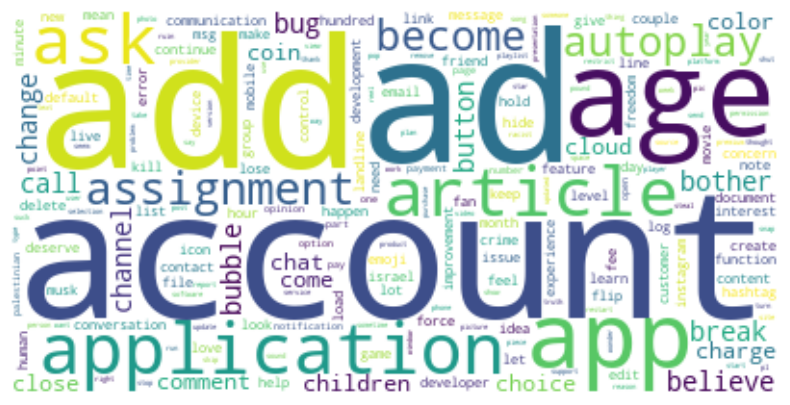

In [24]:
!pip install matplotlib wordcloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Create a string from the list of words
text = ' '.join(feature_names)

# Generate the word cloud

word_cloud = WordCloud(collocations = False, background_color = 'white').generate(text)

# Display the generated Word Cloud

plt.figure(figsize=(10, 5))
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis('off')  # Turn off axis labels
plt.show()
